> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Gapminder]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Gapminder has collected a lot of information about how people live their lives in dierent countries, tracked across the years, and on a number of dierent indicators.
 
### Question(s) for Analysis

1. Discover correlation between GDP and Life Exp?
2. GDP growth per continet in the last 20 years?
3. Bottom 10 countries by GDP & Life Exp?
4. Top 10 countries by GDP & Life Exp?
5. Gapminder trends in Egypt in the last 20 years?


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry_convert as pc
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# function to tchange values to float
def vtf(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x or 'k' in x:
        if len(x) > 1:
            return float(x.replace('K', '').replace('k','')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x)

In [3]:
# function to add continent name based on country name
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "None"

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gdp.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan   674   674   674   674   674   674   674   674   674   
1                Angola   691   693   697   700   702   705   709   712   716   
2               Albania   746   746   746   746   746   747   747   747   747   
3               Andorra  1340  1340  1340  1350  1350  1350  1350  1360  1360   
4  United Arab Emirates  1120  1120  1120  1130  1130  1140  1140  1150  1150   

   ...   2041   2042   2043   2044   2045   2046   2047   2048   2049   2050  
0  ...   2880   2940   3000   3070   3130   3200   3270   3340   3410   3480  
1  ...   8040   8220   8390   8570   8750   8940   9120   9320   9520   9720  
2  ...  24.5k    25k  25.5k  26.1k  26.6k  27.2k  27.8k  28.3k  28.9k  29.6k  
3  ...   108k   111k   113k   116k   118k   121k   123k   126k   128k   131k  
4  ...  74.5k  76.1k  77.7k  79.3k    81k  82.7k  84.5k  86.3k  88.1k    90k  

[5 rows x 252 columns]

In [5]:
# melt the dataframes in order to have the years as a column for easier filtration. 
df_gdp = pd.melt(df_gdp, id_vars =['country'], var_name="year", value_vars =df_gdp.columns[1:], value_name= "gdp")
df_gdp

country  year    gdp
0               Afghanistan  1800    674
1                    Angola  1800    691
2                   Albania  1800    746
3                   Andorra  1800   1340
4      United Arab Emirates  1800   1120
...                     ...   ...    ...
48940                 Samoa  2050   9950
48941                 Yemen  2050   4810
48942          South Africa  2050  17.6k
48943                Zambia  2050   4270
48944              Zimbabwe  2050   4220

[48945 rows x 3 columns]

In [6]:
# turn gdp values to float
df_gdp['gdp'] = df_gdp['gdp'].apply(vtf)
df_gdp

country  year      gdp
0               Afghanistan  1800    674.0
1                    Angola  1800    691.0
2                   Albania  1800    746.0
3                   Andorra  1800   1340.0
4      United Arab Emirates  1800   1120.0
...                     ...   ...      ...
48940                 Samoa  2050   9950.0
48941                 Yemen  2050   4810.0
48942          South Africa  2050  17600.0
48943                Zambia  2050   4270.0
48944              Zimbabwe  2050   4220.0

[48945 rows x 3 columns]

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
df_pop = pd.read_csv('population_total.csv')
df_pop.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2               Albania   400k   402k   404k   405k   407k   409k   411k   
3               Andorra   2650   2650   2650   2650   2650   2650   2650   
4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  3.28M  3.28M  ...  76.6M  76.4M  76.3M  76.1M    76M  75.8M  75.6M  75.4M   
1  1.57M  1.57M  ...   168M   170M   172M   175M   177M   179M   182M   184M   
2   413k   414k  ...  1.33M   1.3M  1.27M  1.25M  1.22M  1.19M  1.17M  1.14M   
3   2650   2650  ...    63k  62.9k  62.9k  62.8k  62.7k  62.7k  62.6k  62.5k   
4  40.2k  40.2k  ...  12.3M  12.4M  12.5M  12.5M  12.6M  12.7M  12.7M  12.8M   

    2099   2100  
0  75.2M  74.9M  
1   186M   188M  
2  1.11M  1.09M  
3  62.5k  62.4k  
4  12.8M  12.9M  

[5 rows x 302 columns]

In [8]:
# melt the dataframes in order to have the years as a column for easier filtration. 
df_pop = pd.melt(df_pop, id_vars =['country'], var_name="year", value_vars =df_pop.columns[1:], value_name= "pop")
df_pop

country  year    pop
0               Afghanistan  1800  3.28M
1                    Angola  1800  1.57M
2                   Albania  1800   400k
3                   Andorra  1800   2650
4      United Arab Emirates  1800  40.2k
...                     ...   ...    ...
59292                 Samoa  2100   310k
59293                 Yemen  2100  53.2M
59294          South Africa  2100  79.2M
59295                Zambia  2100  81.5M
59296              Zimbabwe  2100    31M

[59297 rows x 3 columns]

In [9]:
# turn population values to float
df_pop['pop'] = df_pop['pop'].apply(vtf)
df_pop

country  year         pop
0               Afghanistan  1800   3280000.0
1                    Angola  1800   1570000.0
2                   Albania  1800    400000.0
3                   Andorra  1800      2650.0
4      United Arab Emirates  1800     40200.0
...                     ...   ...         ...
59292                 Samoa  2100    310000.0
59293                 Yemen  2100  53200000.0
59294          South Africa  2100  79200000.0
59295                Zambia  2100  81500000.0
59296              Zimbabwe  2100  31000000.0

[59297 rows x 3 columns]

In [10]:
df_lex = pd.read_csv('life_expectancy_years.csv')
df_lex.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
1                Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2               Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  ...  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  ...  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]

In [11]:
df_lex = pd.melt(df_lex, id_vars =['country'], var_name="year", value_vars =df_lex.columns[1:], value_name= "liex")
df_lex

country  year  liex
0               Afghanistan  1800  28.2
1                    Angola  1800  27.0
2                   Albania  1800  35.4
3                   Andorra  1800   NaN
4      United Arab Emirates  1800  30.7
...                     ...   ...   ...
58690                 Samoa  2100  80.8
58691                 Yemen  2100  78.0
58692          South Africa  2100  77.7
58693                Zambia  2100  77.1
58694              Zimbabwe  2100  74.4

[58695 rows x 3 columns]

<a id='wrangling'></a>
## Data Wrangling

In [12]:
# merge the dataframes
from functools import reduce
dfs = [df_pop, df_gdp, df_lex,]
dfr = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'year'],how='inner'), dfs)
dfr

country  year         pop      gdp  liex
0               Afghanistan  1800   3280000.0    674.0  28.2
1                    Angola  1800   1570000.0    691.0  27.0
2                   Albania  1800    400000.0    746.0  35.4
3                   Andorra  1800      2650.0   1340.0   NaN
4      United Arab Emirates  1800     40200.0   1120.0  30.7
...                     ...   ...         ...      ...   ...
48940                 Samoa  2050    267000.0   9950.0  74.3
48941                 Yemen  2050  48100000.0   4810.0  72.2
48942          South Africa  2050  75500000.0  17600.0  70.9
48943                Zambia  2050  39100000.0   4270.0  69.8
48944              Zimbabwe  2050  23900000.0   4220.0  67.6

[48945 rows x 5 columns]

In [13]:
#get dtaframe shape
print(dfr.shape)


(48945, 5)


In [14]:
#get dataframes info
print(dfr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48945 entries, 0 to 48944
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  48945 non-null  object 
 1   year     48945 non-null  object 
 2   pop      48945 non-null  float64
 3   gdp      48945 non-null  float64
 4   liex     47316 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.2+ MB
None



### Data Cleaning

In [15]:
#sort the dataframes based on country and year
dfr=dfr.sort_values(["country", "year"])
#drop null values in dataframes
dfr = dfr.dropna()
#show dataframes
dfr

country  year         pop     gdp  liex
0      Afghanistan  1800   3280000.0   674.0  28.2
195    Afghanistan  1801   3280000.0   674.0  28.2
390    Afghanistan  1802   3280000.0   674.0  28.2
585    Afghanistan  1803   3280000.0   674.0  28.2
780    Afghanistan  1804   3280000.0   674.0  28.2
...            ...   ...         ...     ...   ...
48164     Zimbabwe  2046  22800000.0  3880.0  66.9
48359     Zimbabwe  2047  23100000.0  3960.0  67.1
48554     Zimbabwe  2048  23400000.0  4050.0  67.3
48749     Zimbabwe  2049  23700000.0  4130.0  67.4
48944     Zimbabwe  2050  23900000.0  4220.0  67.6

[47316 rows x 5 columns]

In [16]:
#add continent coulmn to the list
dfr['continent'] = dfr['country'].apply(country_to_continent)
dfr

country  year         pop     gdp  liex continent
0      Afghanistan  1800   3280000.0   674.0  28.2      Asia
195    Afghanistan  1801   3280000.0   674.0  28.2      Asia
390    Afghanistan  1802   3280000.0   674.0  28.2      Asia
585    Afghanistan  1803   3280000.0   674.0  28.2      Asia
780    Afghanistan  1804   3280000.0   674.0  28.2      Asia
...            ...   ...         ...     ...   ...       ...
48164     Zimbabwe  2046  22800000.0  3880.0  66.9    Africa
48359     Zimbabwe  2047  23100000.0  3960.0  67.1    Africa
48554     Zimbabwe  2048  23400000.0  4050.0  67.3    Africa
48749     Zimbabwe  2049  23700000.0  4130.0  67.4    Africa
48944     Zimbabwe  2050  23900000.0  4220.0  67.6    Africa

[47316 rows x 6 columns]

In [17]:
#check unique values in continent coulmn 
dfr.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'None'], dtype=object)

In [18]:
#get the country that had none in continent coulmn 
dfr.query('continent=="None"').country.unique()

array(['Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Hong Kong, China', 'Lao', 'Micronesia, Fed. Sts.',
       'St. Vincent and the Grenadines', 'Timor-Leste'], dtype=object)

In [19]:
#replace the none values in continet coulmn with the right continet name
dfr.loc[(dfr['country'] == "St. Vincent and the Grenadines"), 'continent'] = 'North America'
dfr.loc[(dfr['country'] == 'Lao') | (dfr['country'] == "Hong Kong, China" ) | (dfr['country'] == 'Timor-Leste' ), 'continent'] = 'Asia'
dfr.loc[(dfr['country'] == "Cote d'Ivoire") | (dfr['country'] == 'Congo, Rep.' ) | (dfr['country'] == 'Congo, Dem. Rep.' ), 'continent'] = 'Africa'
dfr.loc[(dfr['country'] == "Micronesia, Fed. Sts."), 'continent'] = 'Oceania' 

In [20]:
#rechek comtinet coulmn to make sure no more none values
dfr.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [21]:
#create subset dataframe to use it in analysis (year >= 2000)
dft=dfr.query('year>="2000"')
dft=dft.query('year<="2020"')
dft

country  year         pop     gdp  liex continent
39000  Afghanistan  2000  20800000.0   578.0  54.7      Asia
39195  Afghanistan  2001  21600000.0   563.0  54.8      Asia
39390  Afghanistan  2002  22600000.0  1190.0  55.5      Asia
39585  Afghanistan  2003  23700000.0  1240.0  56.5      Asia
39780  Afghanistan  2004  24700000.0  1200.0  57.1      Asia
...            ...   ...         ...     ...   ...       ...
42314     Zimbabwe  2016  14000000.0  2940.0  59.2    Africa
42509     Zimbabwe  2017  14200000.0  3030.0  59.9    Africa
42704     Zimbabwe  2018  14400000.0  3130.0  60.6    Africa
42899     Zimbabwe  2019  14600000.0  2840.0  61.0    Africa
43094     Zimbabwe  2020  14900000.0  2560.0  60.7    Africa

[4086 rows x 6 columns]

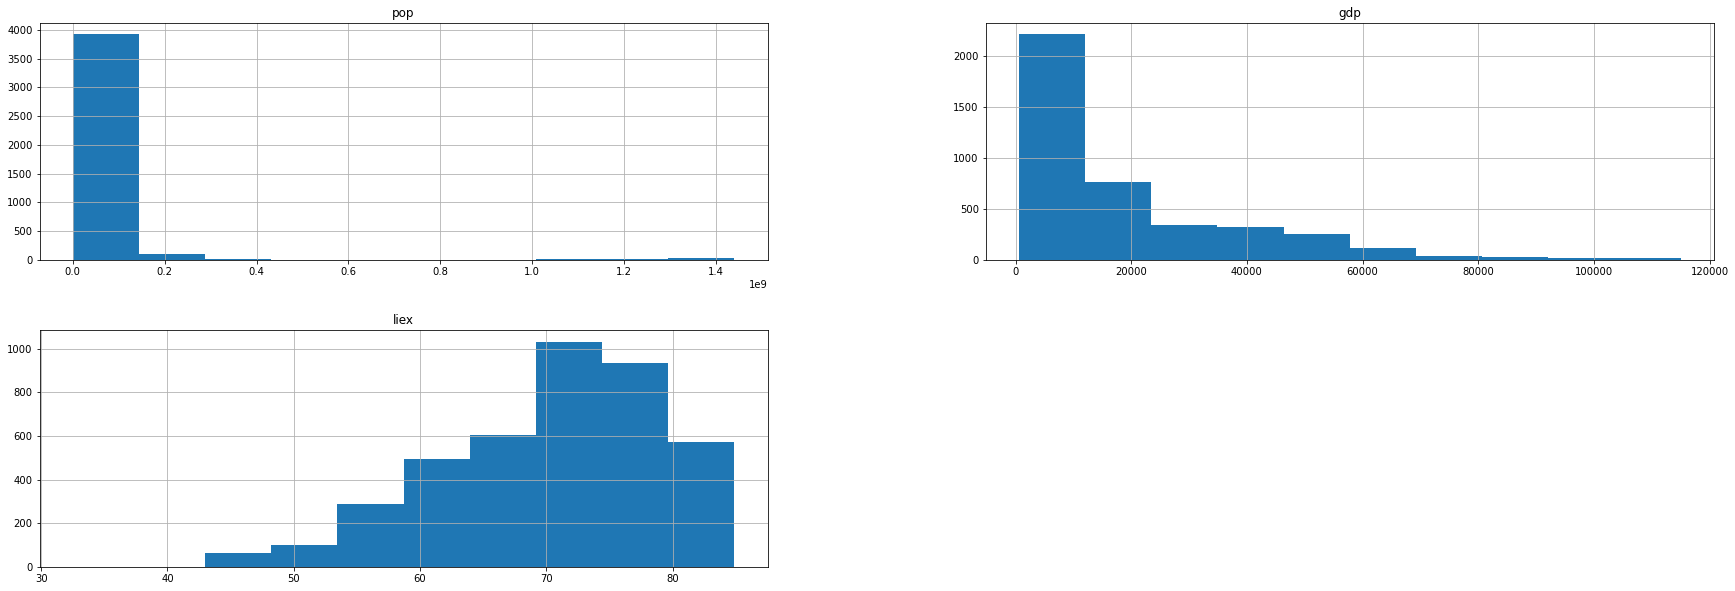

In [22]:
#create genral histgram to have a visual look on the data
dft.hist(figsize=(30,10));

In [23]:
# get data discribion 
dft.describe()

pop            gdp         liex
count  4.086000e+03    4086.000000  4086.000000
mean   3.574091e+07   18137.871268    70.351836
std    1.357356e+08   19744.193032     8.562140
min    9.390000e+03     563.000000    32.500000
25%    1.990000e+06    3550.000000    64.500000
50%    7.655000e+06   10750.000000    72.200000
75%    2.420000e+07   25875.000000    76.600000
max    1.440000e+09  115000.000000    84.900000

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Discover correlation between GDP and Life exp?)

We will need to plot the GDP aginst the life expextancy for each country 
to see the correlation between them 

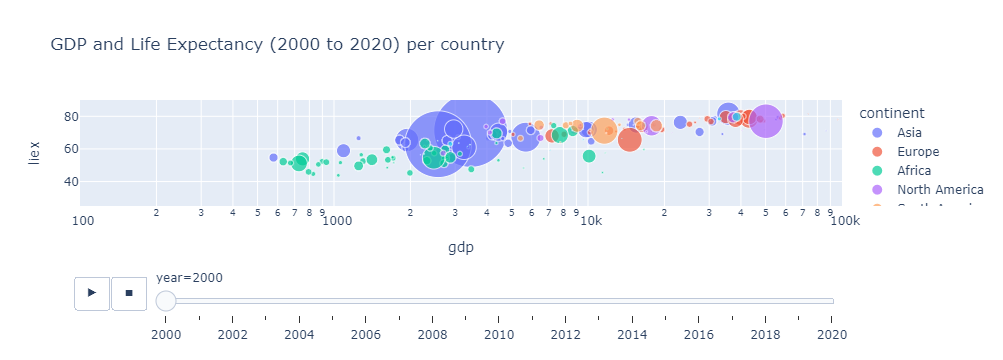

In [24]:
px.scatter(data_frame= dft,
           x= "gdp",
           y="liex", animation_frame="year",
           animation_group="country",
           size="pop", 
           color="continent", 
           hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90], title='GDP and Life Expectancy (2000 to 2020) per country')



From the above graph we see that through time the GDP and Life Expectancy are increasing 


We will plot the GDP aginst the life expextancy for each continent 

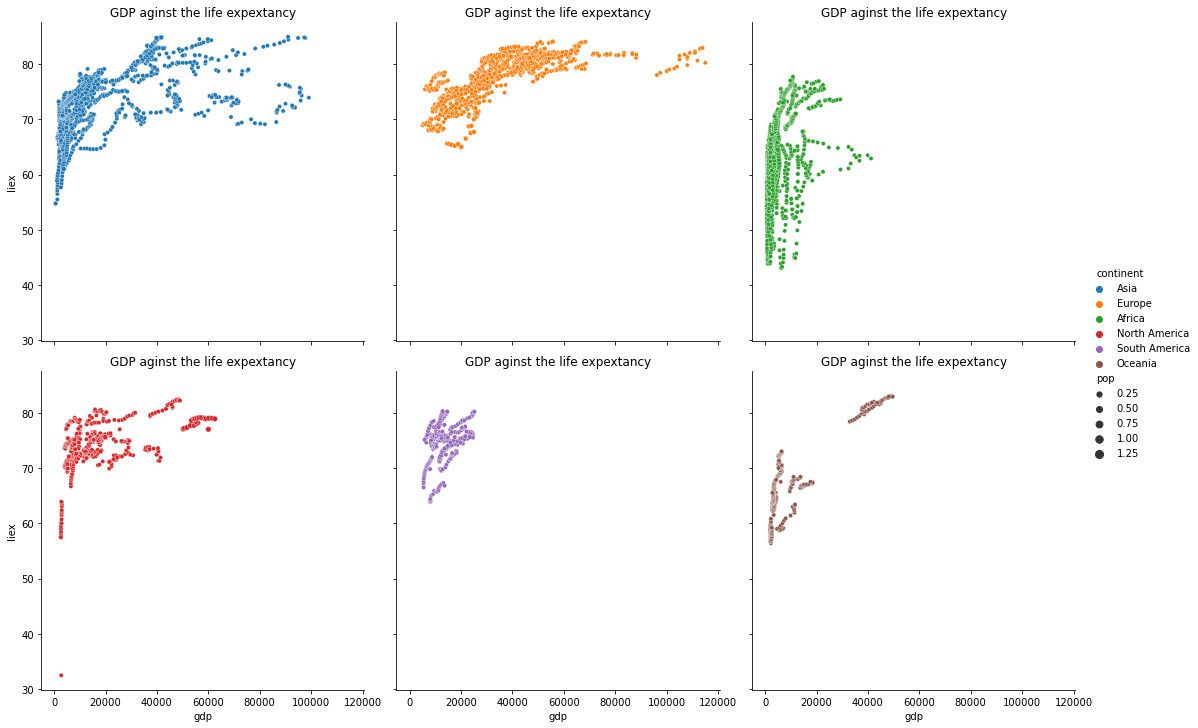

In [25]:
sns.relplot(
    x="gdp",
    y="liex",
    size="pop",
    hue="continent",
    col="continent",
    col_wrap=3,
    data=dft 
).set(title='GDP aginst the life expextancy');

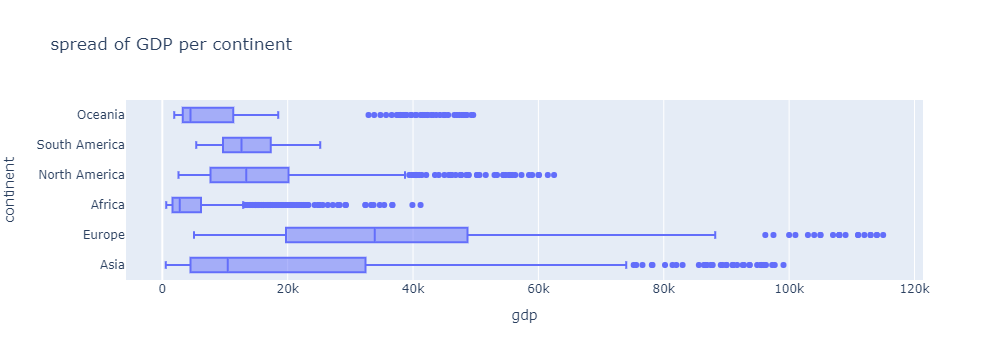

In [26]:
fig = px.box(dft, 
             x="gdp", 
             y="continent",
            title="spread of GDP per continent")
fig.show()

As we see above that per continent the correlation between the gdp and life expectancy is not the same for each one 
as the gdp range is very narrow in Asia compared to the GDP life expectancy


now lets plot a trend line in order to further understand the corelation between the GDP and Life Expectancy

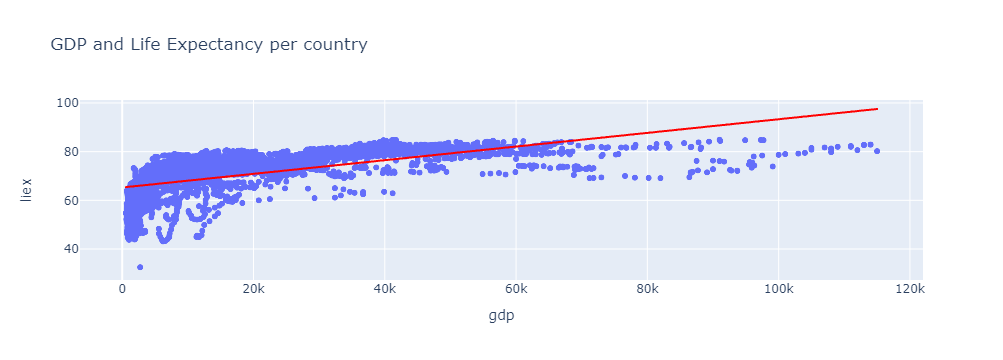

In [27]:
fig = px.scatter(data_frame = dft, 
                 x="gdp", 
                 y="liex", 
                 trendline="ols", 
                 title='GDP and Life Expectancy per country',
                 trendline_color_override="red")
fig.show()

### Research Question 2  (GDP & Life Exp avrage growth per continet in the last 20 years?)

In [28]:
dfg = dft.groupby(['continent']).mean().sort_values(by='gdp' ,ascending=True)
dfl = dft.groupby(['continent']).mean().sort_values(by='liex' ,ascending=True)

ploting the GDP aginst the life expextancy for each continent shoing us that the vast diffrance between europe and africa 
in both of them 

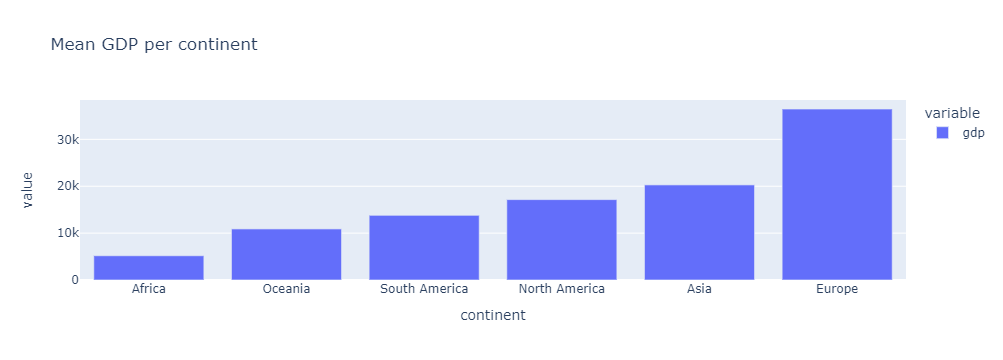

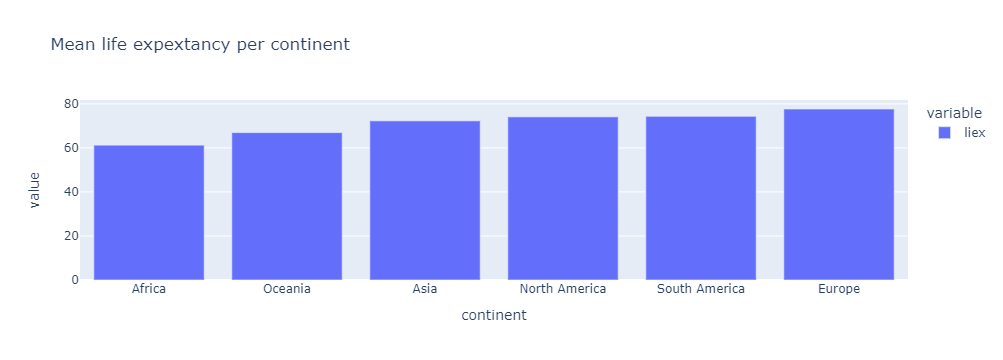

In [29]:
fig = px.bar(data_frame= dfg['gdp'], title="Mean GDP per continent ")
fig.show()
fig = px.bar(data_frame= dfl['liex'], title="Mean life expextancy per continent ")
fig.show()

### Research Question 3 GDP & Life Exp minumum avrage growth per country in the last 20 years?

In [30]:
dfctg = dft.groupby(['country']).mean().sort_values(by='gdp' ,ascending=True)[:10]
dfctl = dft.groupby(['country']).mean().sort_values(by='liex' ,ascending=True)[:10]

GDP & Life Exp minumum avrage growth per country for the last 10 
we can plot them so we can see what is the relation between them 

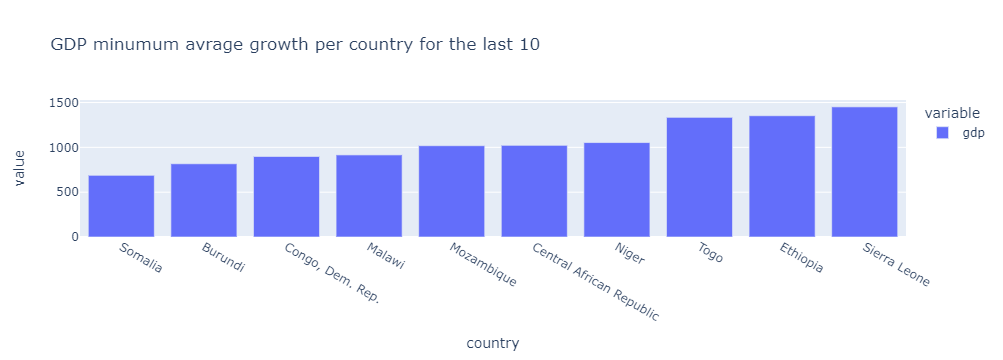

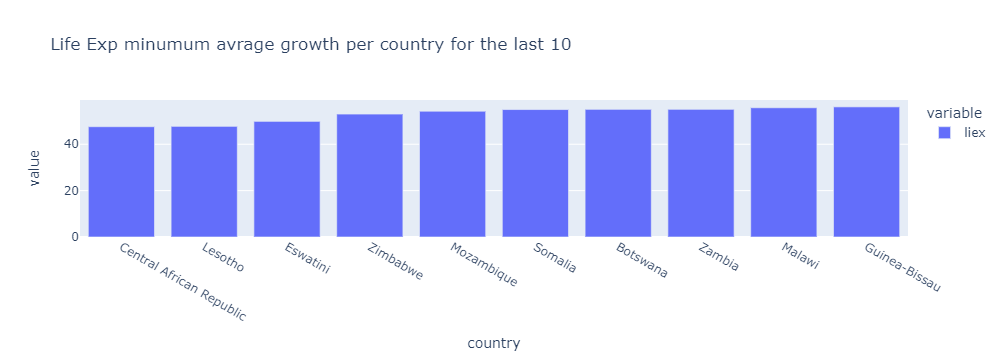

In [31]:
fig = px.bar(data_frame= dfctg['gdp'], title="GDP minumum avrage growth per country for the last 10  ")
fig.show()
fig = px.bar(data_frame= dfctl['liex'], title="Life Exp minumum avrage growth per country for the last 10  ")
fig.show()

### Research Question 4 GDP & Life Exp max avrage growth per country in the last 20 years?

In [32]:
dfcbg = dft.groupby(['country']).mean().sort_values(by='gdp' ,ascending=True)[-10:]
dfcbl = dft.groupby(['country']).mean().sort_values(by='liex' ,ascending=True)[-10:]

GDP & Life Exp max avrage growth per country for the bigest 10 

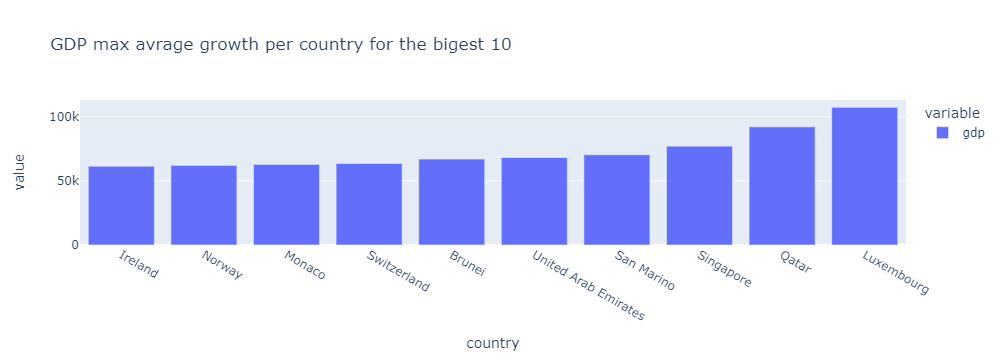

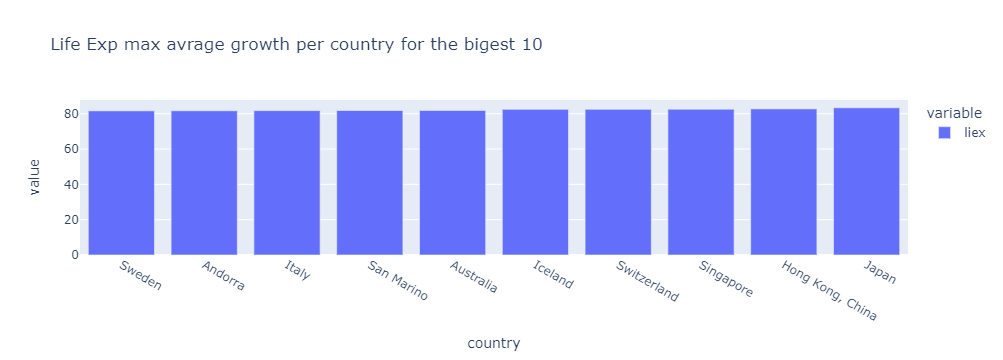

In [33]:
fig = px.bar(data_frame= dfcbg['gdp'], title="GDP max avrage growth per country for the bigest 10 " )

fig.show()
fig = px.bar(data_frame= dfcbl['liex'], title="Life Exp max avrage growth per country for the bigest 10 ")
fig.show()

### Research Question 5  (Data trends in Egypt)

We will further exploer data for Egypt

-Ploting GDP growth per year for Egypt
-Population of Egypt
-GDP per capita in Egypt
-Life expectancy in Egypt
over the years which will further point us to the change  of data through time

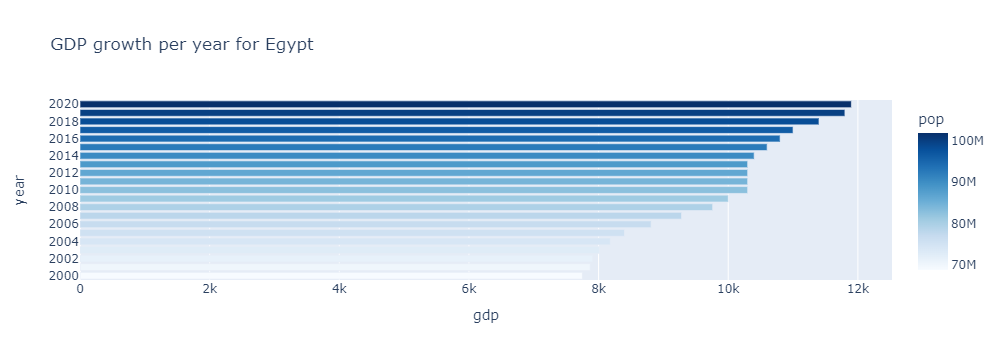

In [34]:
fig = px.bar(data_frame= dft.query("country == 'Egypt'"),
             y='year', 
             x='gdp',
             hover_data=['pop', 'gdp'], 
             color='pop',
             color_continuous_scale="blues" , orientation="h", title="GDP growth per year for Egypt ")
fig.show()

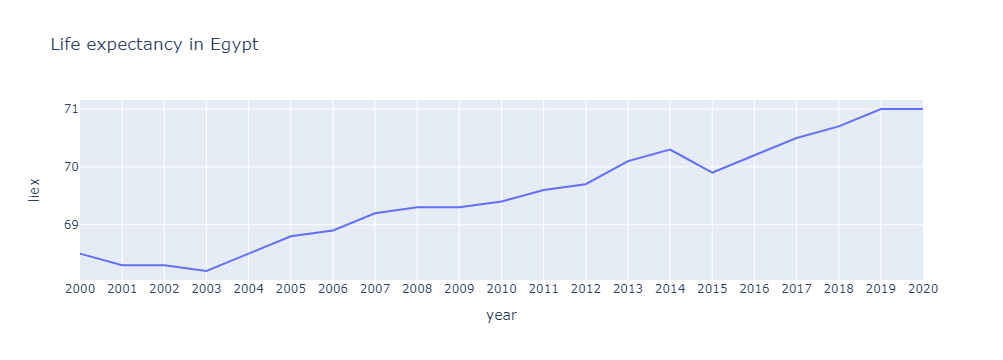

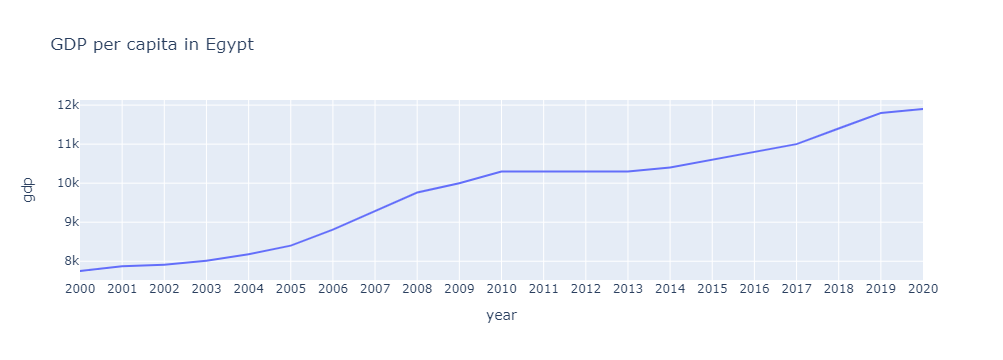

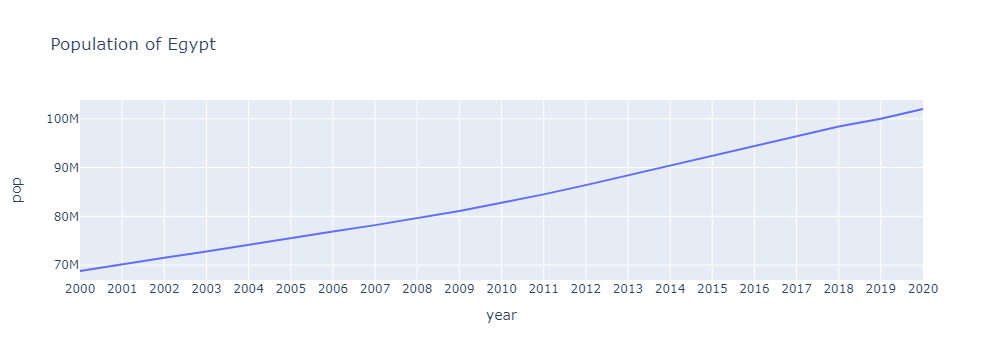

In [35]:

fig = px.line(dft.query('country=="Egypt"'), x="year", y="liex", title='Life expectancy in Egypt')
fig.show()
fig = px.line(dft.query('country=="Egypt"'), x="year", y="gdp", title='GDP per capita in Egypt')
fig.show()
fig = px.line(dft.query('country=="Egypt"'), x="year", y="pop", title='Population of Egypt')
fig.show()

<a id='conclusions'></a>
## Conclusions

1. Discover correlation between GDP and Life Exp?
  There is a direct positive coorloation between GDP and Life Exp.
2. GDP growth per continet in the last 20 years?
  In the last 20 years Europe lead the avrage growth in both GDP & Life Exp and Africa is at the bottom.
3. Bottom 10 countries by GDP & Life Exp?
  As Expected the Bottom 10 countries by GDP & Life Exp are in Africa confirming the output of Q2.
4. Top 10 countries by GDP & Life Exp?
  As Expected the top 10 countries by GDP & Life Exp are in Europe & Asia confirming the output of Q2.
5. Gapminder trends in Egypt in the last 20 years?
 Life Exp increased from 68.5 to 71
 GDP increased from 7750 to 12k
 Population increased from 68.8M to 102M
 
 
 ## Limitation
 As we can see although the data shows the progress of  GDP aginst the life expextancy over time the spread of GDP over population is not visable as the mean and standard deviation for it is not shown 
 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset2.ipynb'])

4294967295